# Capstone - Classifying plastic resin codes for recycling

# Background

Under the [Sustainable Singapore Blueprint](https://www.straitstimes.com/multimedia/graphics/2022/04/recycle-me-not/index.html), Singapore wants to improve the domestic recycling rate to 30 per cent by 2030. Indeed, there has been many educational posters and campaigns to promote recycling such as the [Bloobox vended islandwide](https://www.nea.gov.sg/media/news/news/index/a-free-bloobox-for-every-household-to-encourage-recycling-at-home) from March to April, earlier this year.

Accordintoot the [nea recycling statistics](https://www.nea.gov.sg/our-services/waste-management/waste-statistics-and-overall-recycling) the total amount of waste generated increased from 6.94 to 7.39 million tons in 2022. Of this 7.39 million tones, the plastics waste stream accounted for 1.001 million tonnes. Only 57,000 tonnes were recycled, a mere 6%. In fact, the [domestic recycling rate in Singapore in 2022 was the lowest recycling rate in more than a decade](https://www.straitstimes.com/singapore/domestic-recycling-rate-in-singapore-lowest-in-over-a-decade), dropping 12 percent from the previous year. While the breakdown is not specified for domestic, it can be inferred that plastic recycling rates is around the forementioned 6%. This is despite Singapore's [National Recycling Programme](https://www.nea.gov.sg/our-services/waste-management/3r-programmes-and-resources/national-recycling-programme) that was launched back in 2001 where the blue recycling bins and recycling collection services were made available to the public in HDB estates as well as private properties (landed and apartment/condomimums alike).


Blueprints, campaigns, and programmes aside, it is equally important to delve into the materials itself when recycling is mentioned. Plastic Identification Codes (or more accurately, Resin identification code) are commonly found marked on the plastic materials to facilitate the identification of the plastic type for recycling. Example below.
<center><img src="assets/plastic-resin-codes.jpg" width="512" height="300"> </center>

The purpose for labelling the different types of plastic is due to the different properties of each plastic resin at the molecular level. A clear difference would be the different temperatures that the resins melt at, in other words not all plastics are the same. This is of significance during the recycling process since where the purity of the various plastic resins being recycled would impact the final purity of the regenerated plastic raw material for use/sale. 

More importantly, Singapore acceded to the [Basel Convention](https://www.nea.gov.sg/corporate-functions/resources/legislation-international-law/multilateral-environmental-agreements/chemical-safety/basel-convention) back in 1996 which binds us to the threshold limit of < 0.5% contamination of single stream plastic waste. In other words, in order for materials recovery facility to export the materials to overseas facilities for further processing, it has to meet this criterion. This is a huge challenge on the materials recovery facility tasked to do as mentioned in a recent [CNA article](https://www.channelnewsasia.com/cna-insider/plastic-recycling-rate-singapore-exports-bottled-water-safe-3723811) where the main issue at hand is contamination, manually identifying correctly, the resin type of the 'recycled' plastic as well as the economics of recycling such materials.

On top of this or in part due to the above reasons, it is important point to note that in Singapore [not all plastics are recyclable.](https://plasticlite.sg/) Only Resin identification code 1 (PET), 2 (HDPE), 4 (LDPE) and 5 (PP) are recyclable. The rest of the codes 3 (PVC), 6 (PS), and 7 (Others) are not recycled.


# Problem statement


With the above background, it becomes apparent that recycling is not a straightforward process. Just plastics alone have 7 associated resin codes/symbols of which 4 are recycle and 3 are not. Other than these 7 symbols, these are not the only symbols out there relating to recycling and on top of it, there are other markings on the plastic that may look similar but representing other unrelated information.

Therefore it can be said that in order to recycle effectively, there is a necessary knowledge that an individual requires in order to identify and sort their waste material for recycling. This may be discouraging for the layperson, affecting their recycling habits or their recycling attempts when the plastics they put in the effort to segregate and clean before recycling are wasted since it is not recycled in Singapore.

In order to continue nudging Singapore towards 30% recycling rate by 2030, NEA is exploring new ways to encouraging Singapore to recycle on top of existing campaigns and posters. A team in NEA's Information Technology Division has been tasked with developing a proof-of-concept project.

> The purpose of such a project is to determine if it there is a feasible way to assist the general public in their recycling activities in particular, determining which plastics are recyclable. Utilising computer vision in a binary classification model a plastic material can be classified as recyclable or not by recognising the Resin Identification markings on the plastic material, thereby reducing the confusion and knowledge requirement for the layperson to recycle effectively.
The scoring metric used in classification is F1 score with a 80% being used as a threshold of success for the project to be considered feasible.

With a good cv model to classify the various plastic resin symbols as recyclable or not, the layperson will be better equipped to recycle plastics appropriately without having to continually refresh their knowledge in order identify the plastic resin recyclability. If such a classification by a cv model is possible, this project can then be further developed to encompass other recyclables classes for deployment under the NEA banner to the general publics as part of their campaigns to enecourage rcycling.


# Library imports

In [1]:
#Importing libraries and modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
import seaborn as sns
import pandas as pd
import tqdm
import glob
#!pip install tensorflow
import tensorflow as tf

# For reproducibility
np.random.seed(42)

# Keras imports for image preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import utils # to one-hot encode response variable 
#!pip install opencv-python
import cv2
from PIL import Image
#!pip install -U albumentations --no-binary qudida,albumentations
import albumentations as albu


In [3]:
#for checking presence of gpu
device_name = tf.test.gpu_device_name()
if "GPU" not in device_name:
    print("GPU device not found")
else:
    print('Found GPU at: {}'.format(device_name))

GPU device not found



# Data import

A data set has been obtained online at [kaggle](https://www.kaggle.com/datasets/piaoya/plastic-recycling-codes) and it has been fund to have segregated data into 7 types of plastics as well as a last class of non-plastic symbols and other random images. For this project, the non-plastic class will be ignored. Additional images manually scraped online as well as personally taken images are added into the mix as well.

## Data imports
Import in data with each class as a subfolder.


In [2]:
# Load the Train and Validation data
seven_plastics_data = ImageDataGenerator(rescale=1./255).flow_from_directory('data\seven_plastics',
                                                                             class_mode= 'sparse',
                                                                             shuffle=False
                                                                             )

Found 579 images belonging to 7 classes.


In [3]:
# Check the classes that ImageDataGenerator was able to find using .class_indices
seven_plastics_data.class_indices

{'1_pet': 0,
 '2_pehd': 1,
 '3_pvc': 2,
 '4_peld': 3,
 '5_pp': 4,
 '6_ps': 5,
 '7_others': 6}

> Images classes are loaded in correctly according to the correct subfolder

# EDA
- Sample images display
- Pictures no. distribution
- Image data distribution


## Sample images display

In [45]:
def visualize_class_samples(loaded_data, num_samples_per_class=7):
    # Create a dictionary to keep track of sampled classes
    sampled_classes = {}
    
    for images, labels in loaded_data:
        for i in range(len(images)):
            label = int(labels[i])
            
            # Check if we have already sampled from this class
            if label not in sampled_classes:
                # Display the image
                plt.figure(figsize=(4, 4))
                plt.axis('off')
                plt.imshow(images[i])
                plt.title(f"Sample: Type {label + 1} Symbol")
                plt.show()
                
                # Mark the class as sampled
                sampled_classes[label] = True
            
            # Check if we have sampled from all classes
            if len(sampled_classes) == num_samples_per_class:
                return

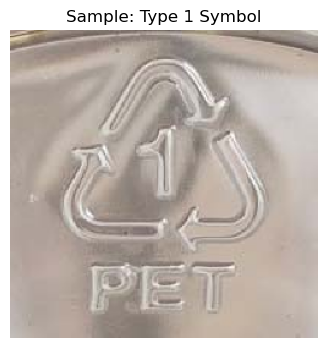

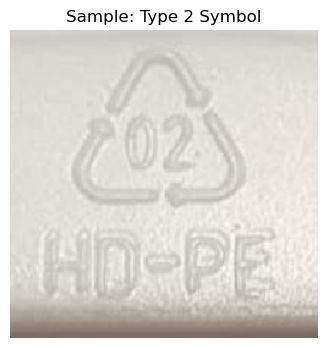

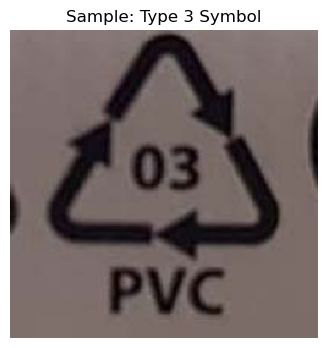

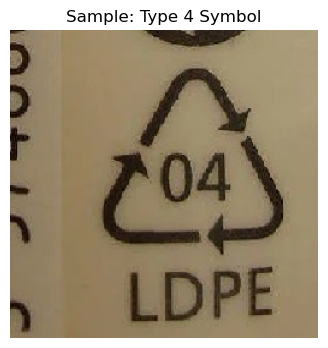

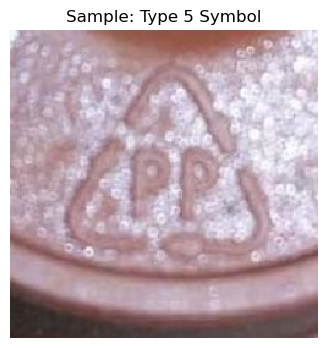

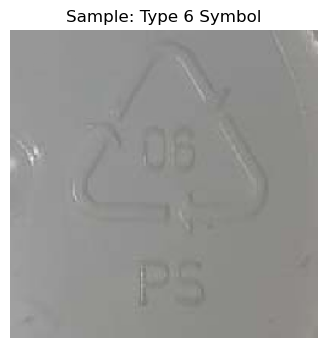

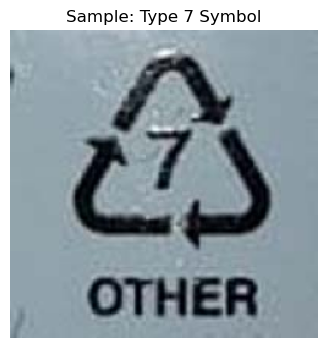

In [50]:
#visualize_samples from each class
visualize_class_samples(seven_plastics_data)

>Images loaded by classes matches the class labelled as y truth. I.e. the dataset loading process has gone smoothly with no issues.

## Pictures no. distribution

In [54]:
class_counts = {}
dataset_dir = './data/seven_plastics'
for class_name in os.listdir(dataset_dir):
    if os.path.isdir(os.path.join(dataset_dir, class_name)):
        class_count = len(glob.glob(os.path.join(dataset_dir, class_name, '*')))
        class_counts[class_name] = class_count
    output_folder_path = os.path.join(dataset_dir, class_name, 'output')
    if os.path.exists(output_folder_path):
        if os.path.isdir(output_folder_path):
            class_count = len(glob.glob(os.path.join(dataset_dir, class_name, 'output', '*')))
            class_counts[class_name] += class_count
    

In [55]:
class_counts

{'1_pet': 109,
 '2_pehd': 74,
 '3_pvc': 15,
 '4_peld': 91,
 '5_pp': 186,
 '6_ps': 38,
 '7_others': 66}

In [56]:
#distribution plotting function
def class_distribution(dataset_dir):
    class_counts = {}
    for class_name in os.listdir(dataset_dir):
        if os.path.isdir(os.path.join(dataset_dir, class_name)):
            class_count = len(glob.glob(os.path.join(dataset_dir, class_name, '*')))
            class_counts[class_name] = class_count
        output_folder_path = os.path.join(dataset_dir, class_name, 'output')
        if os.path.exists(output_folder_path):
            if os.path.isdir(output_folder_path):
                class_count = len(glob.glob(os.path.join(dataset_dir, class_name, 'output', '*')))
                class_counts[class_name] += class_count

    if len(class_counts) == 2:
        #plot from
        plt.figure(figsize = (10,6))
        sns.barplot(x = list(class_counts.keys()), 
                    y = list(class_counts.values()),
                    palette = "tab10"
                   )
        plt.xlabel('Class')
        plt.ylabel('Count')
        plt.title('Count of Images in each Class')
        plt.tight_layout()
        plt.show()

    else:
        recycle_list= pd.Series(['Recyclable', 'Recyclable', 'Non-Recyclable', 'Recyclable', 'Recyclable', 'Non-Recyclable', 'Non-Recyclable'])
        class_counts_df = pd.DataFrame(list(class_counts.items()), columns=['class', 'count'])
        class_counts_df['recyclable'] = recycle_list
    
        #plot from
        plt.figure(figsize = (10,6))
        sns.barplot(data = class_counts_df,
                    x = 'class',
                    y = 'count',
                    palette = ['tab:blue' if x == 'Recyclable' else 'orange' for x in class_counts_df['recyclable']]
                    )
        plt.xlabel('Class')
        plt.ylabel('Count')
        plt.title('Count of Images in each Class')
        legend_labels = [mpatches.Patch(color='tab:blue', label='Recyclable'), mpatches.Patch(color='orange', label='Non-Recyclable')]
        plt.legend(handles=legend_labels, loc='upper right')
        plt.show()

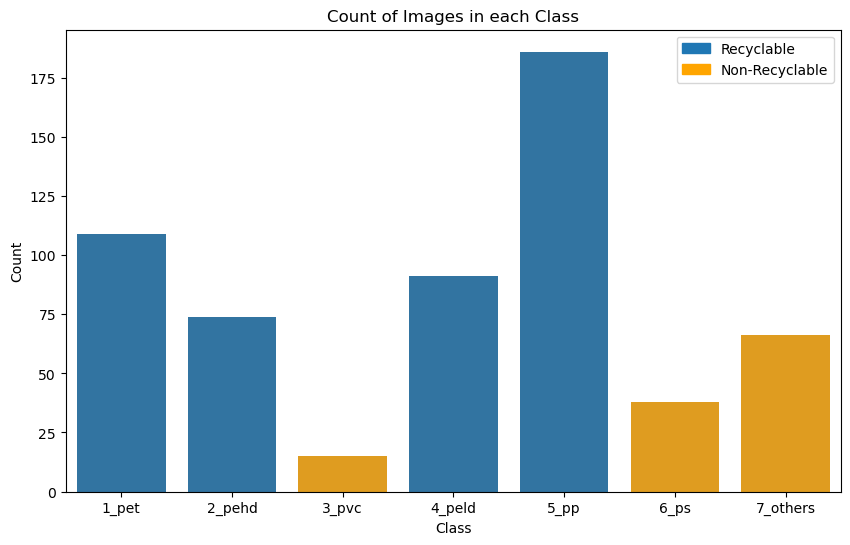

In [57]:
seven_plastics_folder = 'data\seven_plastics'

class_distribution(seven_plastics_folder)

> Current images imported are have an imbalanced, data augmentation would be required. to further improve the robustness of the model

## Image data distribution

In [60]:
#function for counting pixels
def avg_pixel_counter(data_folder, color = None):
    #Get the list of folder names
    class_names = os.listdir(data_folder)
    
    #average pixel values by class
    train_class_averages = {}
    
    for class_name in class_names:
        folder_path = os.path.join(data_folder, class_name)
        images  = os.listdir(folder_path)
        
        #list to hold the avg values
        class_images = []
        
        #Get the list of images names and iterate        
        for i, image_name in enumerate(images):
            try:
                input_image_path = os.path.join(folder_path, image_name)
                input_image = cv2.imread(input_image_path, color)
    #            b, g, r = cv2.split(image) #for colour
                
                # Calc the avg pixel value for image and add to placeholder list
                avg_pixel_value = np.mean(input_image)
                class_images.append(avg_pixel_value)

            except:
                continue
               
        # Check if there's an 'output' folder
        output_folder_path = os.path.join(folder_path, 'output')
        if os.path.exists(output_folder_path):
            nested_images = os.listdir(output_folder_path)
                    
            #Get the list of nested_images names and iterate        
            for j, nested_image_name in enumerate(nested_images):
                nested_image_path = os.path.join(output_folder_path, nested_image_name)
                nested_image = cv2.imread(nested_image_path, color)
    #            b, g, r = cv2.split(image) #for colour
                
                # Calc the avg pixel value for image and add to placeholder list
                avg_pixel_value = np.mean(nested_image)
                class_images.append(avg_pixel_value)

        # Calculate the average pixel value for the class
    #    class_average = np.mean(class_images)
        train_class_averages[class_name] = class_images
    return train_class_averages

In [61]:
# Average the pixels of each class
#Get the list of folder names
class_names = os.listdir(seven_plastics_folder)

#average pixel values by class
class_averages = {}

for class_name in class_names:
    folder_path = os.path.join(seven_plastics_folder, class_name)
    images  = os.listdir(folder_path)
    
    #list to hold the avg values
    class_images = []
    
    #Get the list of images names and iterate        
    for i, image_name in enumerate(images):
        try:
            input_image_path = os.path.join(folder_path, image_name)
            input_image = cv2.imread(input_image_path)
#            b, g, r = cv2.split(image) #for colour
            
            # Calc the avg pixel value for image and add to placeholder list
            avg_pixel_value = np.mean(input_image)
            class_images.append(avg_pixel_value)
#            print(class_images)
        except:
            print(f"Failed to load image: {input_image_path}")
    # Calculate the average pixel value for the class
#    class_average = np.mean(class_images)
    class_averages[class_name] = class_images

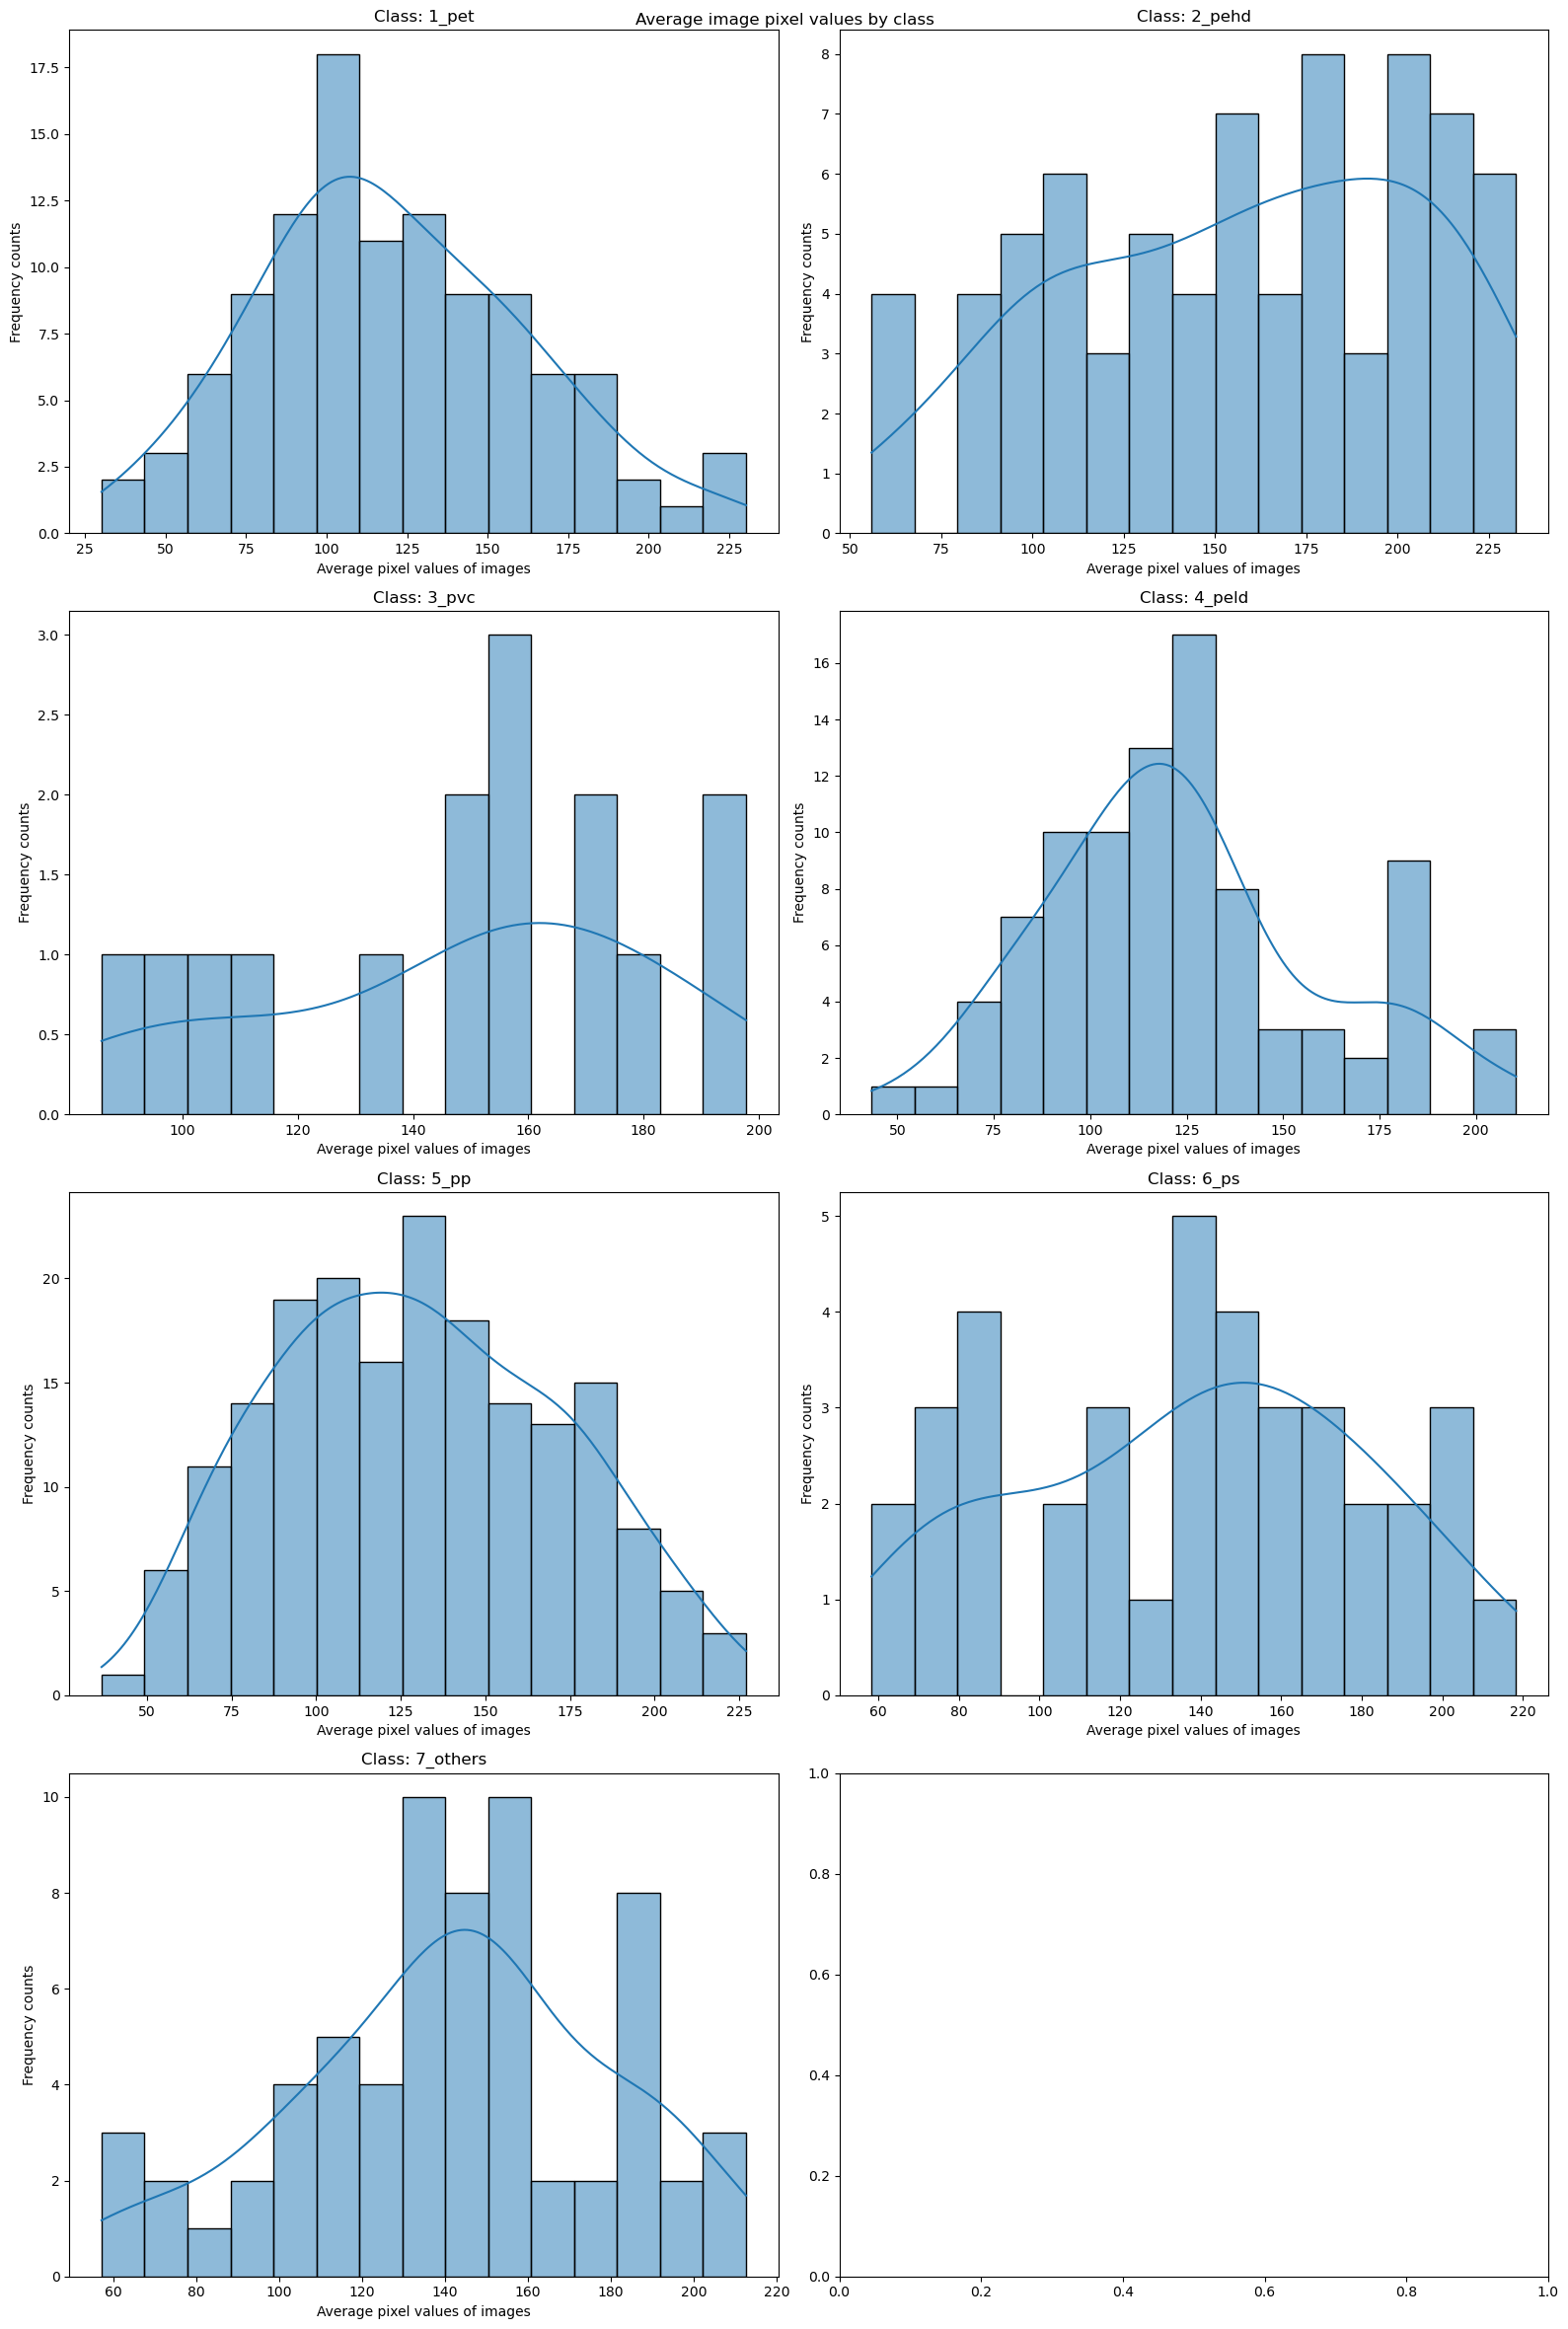

In [62]:
#define train - test folders
class_averages = avg_pixel_counter(seven_plastics_folder)

# Create a figure and axis
fig, axs = plt.subplots(4, 2, figsize=(16, 24))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Average image pixel values by class')

# Iterate through the keys and plot histograms from both dictionaries with different colors
colors = ['blue', 'orange']
for i, key in enumerate(class_averages.keys()):
    row, col = i // 2, i % 2
    averages = class_averages[key]
    
    sns.histplot(data= averages, bins= 15, color='tab:blue', kde=True, ax= axs[row, col], )
    axs[row, col].set_title(f'Class: {key}')
    axs[row, col].set_xlabel('Average pixel values of images')
    axs[row, col].set_ylabel('Frequency counts')

# adjust layout
plt.tight_layout()
# Show the plot
plt.show()

> It is clear that the low image counts are impacting the distribution, in particular, type 2, 4, 6 & 7. Thus, it would be good to approach this as a binary classification instead so as to minimise the impact of the distribution of the images or lack thereof. This reiterates the need to augment the dataset as well to increase the number of images available for the model to train on. Nevertheless it would be prudent to split up the samples as train and test first before augmenting the dataset to prevent data leakage.
> This will be done manually as an approximately 20% holdout set for validation for each class.


# Data preprocessing

In [64]:
for root, dirs, files in os.walk('data'):
	level = root.replace('data', '').count(os.sep)
	indent = ' ' * 4 * (level)
	print('{}{}/'.format(indent, os.path.basename(root)))

data/
    seven_plastics/
        1_pet/
        2_pehd/
        3_pvc/
        4_peld/
        5_pp/
        6_ps/
        7_others/
    train/
        1_pet/
            output/
        2_pehd/
            output/
        3_pvc/
            output/
        4_peld/
            output/
        5_pp/
            output/
        6_ps/
            output/
        7_others/
            output/
    train_binary/
        0_non/
        1_recyclable/
    val/
        1_pet/
            output/
        2_pehd/
            output/
        3_pvc/
            output/
        4_peld/
            output/
        5_pp/
            output/
        6_ps/
            output/
        7_others/
            output/
    val_binary/
        0_non/
        1_recyclable/


### Dataset Structures
To help with understanding the file actions, a Directory Tree Structure is included to help visualise the actions that will take place.
1. Splitting of current dataset into train and val folders for data augmentation per class.
2. Collapsing of the 7 subfolders (classes) into 2 subfolders as recyclable and non-recyclable classs.


## Data Augmentation

### Offline Data Augmentation of individual class output using albumentations

In [65]:
#define augmention function

def augmentor(data_folder, multiplier, image_size):
    #Get the list of folder names
    folder_names = os.listdir(data_folder)
    
    #Set batch size
    min_batch_size = len(os.listdir(data_folder+str(folder_names[4]))) * multiplier
    
    #Instantiate
    transform = albu.Compose([
        albu.RandomBrightnessContrast(p=0.3),  # Randomly adjust brightness and contrast
    #    albu.Rotate(limit=30, p=0.5),          # Rotate the image up to 30 degrees with a 50% probability
        albu.GaussianBlur(blur_limit=(3, 3), p=0.2),  # Apply Gaussian blur with a 20% probability
        albu.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.2, rotate_limit=30, p=0.1),  # Shear, scaling, and rotation
    #    albu.ElasticTransform(p=0.5),          # Apply elastic transformation with a 50% probability
        #    albu.GridDistortion(p=0.5),            # Apply grid distortion with a 50% probability
        albu.OpticalDistortion(p=0.5),         # Apply optical distortion with a 50% probability
        albu.Resize(width=image_size, height=image_size)     # Keep the original size
    ])  

    #Get the list of folder names and iterate
    for folder_name in folder_names:
        folder_path = os.path.join(data_folder, folder_name)
        images  = os.listdir(folder_path)
        
        #determine batch size
        min_augment_rep = round(min_batch_size/len(images))
    
        #Creating the individual output folder if it doesn't exist
        output_folder = os.path.join(folder_path, 'output')
        if not os.path.exists(output_folder):
            os.makedirs(output_folder)

        #Get the list of images names and iterate        
        for i, image_name in enumerate(images):
    
            try:
                input_image_path = os.path.join(folder_path, image_name)
                input_image = cv2.imread(input_image_path)
                input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)  # Convert to RGB
            
                #Generate augmented image
                augmented_image = transform(image=input_image)['image']
                
                # Append a suffix
                base_name, ext = os.path.splitext(image_name)
                augmented_image_name = f"{base_name}_augmented{i}{ext}"
    
                #output path
                output_image_path = os.path.join(output_folder, augmented_image_name)
                cv2.imwrite(output_image_path, cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR))

                 # Apply n unique augmentations for min_augment_time times
                for rep in range(min_augment_rep-1):
                    for n in range(rep):
                        augmented = transform(image=input_image)
                        augmented_image = augmented['image']
    
                        # Append a suffix to the filename to indicate the type of augmentation
                        base_name, ext = os.path.splitext(image_name)
                        augmented_image_name = f"{base_name}_aug{n}{ext}"
    
                        # Define the output file path and save the augmented image
                        output_image_path = os.path.join(output_folder, augmented_image_name)
                        cv2.imwrite(output_image_path, cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR))
    
            except:
                print(f"Failed to load image: {input_image_path}")
        print(f"Augmented images saved in ../{folder_name}/output for {folder_name}")

In [67]:
train_folder = 'data/train/'
val_folder = 'data/val/'
train_multiplier = round(400 / len(os.listdir(train_folder+str(os.listdir(train_folder)[4]))))
val_multiplier = round(100 / len(os.listdir(val_folder+str(os.listdir(val_folder)[4]))))
image_size = 200
augmentor(train_folder, train_multiplier, image_size)
augmentor(val_folder, val_multiplier, image_size)

Augmented images saved in ../1_pet/output for 1_pet
Augmented images saved in ../2_pehd/output for 2_pehd
Augmented images saved in ../3_pvc/output for 3_pvc
Augmented images saved in ../4_peld/output for 4_peld
Augmented images saved in ../5_pp/output for 5_pp
Augmented images saved in ../6_ps/output for 6_ps
Augmented images saved in ../7_others/output for 7_others
Augmented images saved in ../1_pet/output for 1_pet
Augmented images saved in ../2_pehd/output for 2_pehd
Augmented images saved in ../3_pvc/output for 3_pvc
Augmented images saved in ../4_peld/output for 4_peld
Augmented images saved in ../5_pp/output for 5_pp
Augmented images saved in ../6_ps/output for 6_ps
Augmented images saved in ../7_others/output for 7_others


> Augmented images will be returned into a created `output` folder for each train class.

### Reimport augmented data

In [69]:
# Load the Train and Validation data
train_folder = 'data/train/'
val_folder = 'data/val/'
train_data = ImageDataGenerator(rescale=1./255).flow_from_directory(train_folder, 
                                                                     class_mode= 'sparse',
                                                                     shuffle=False
                                                                    )

val_data = ImageDataGenerator(rescale=1./255).flow_from_directory(val_folder, 
                                                                   class_mode='sparse',
                                                                   seed = 42,
                                                                   shuffle=False
                                                                  )

Found 3119 images belonging to 7 classes.
Found 799 images belonging to 7 classes.


In [70]:
# Check the classes that ImageDataGenerator was able to find using .class_indices
class_mappings = train_data.class_indices # save output mappings dictionary to 'class_mappings' variable to use later for predictions
print(class_mappings) # shows us that each class, N, has been-> assigned to class N-1

{'1_pet': 0, '2_pehd': 1, '3_pvc': 2, '4_peld': 3, '5_pp': 4, '6_ps': 5, '7_others': 6}


### Recheck distribution

#### Pictures no. distribution

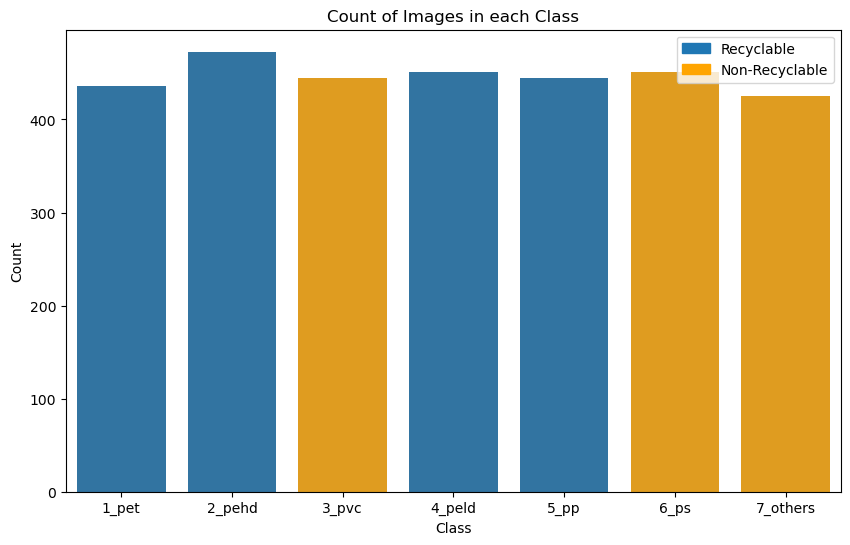

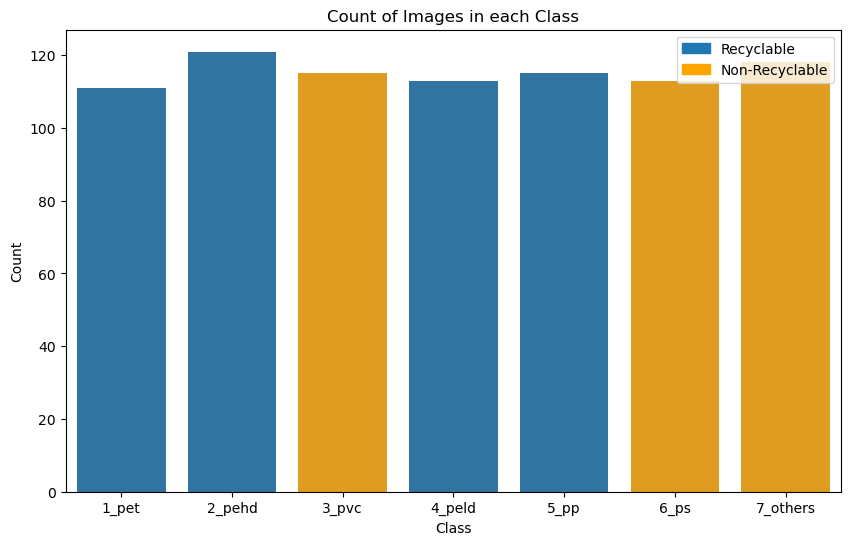

In [72]:
class_distribution(train_folder)
class_distribution(val_folder)

> After data augmentation both train and test have similar image counts for each class which should help mitigate the initial effects of the imbalanced classes.

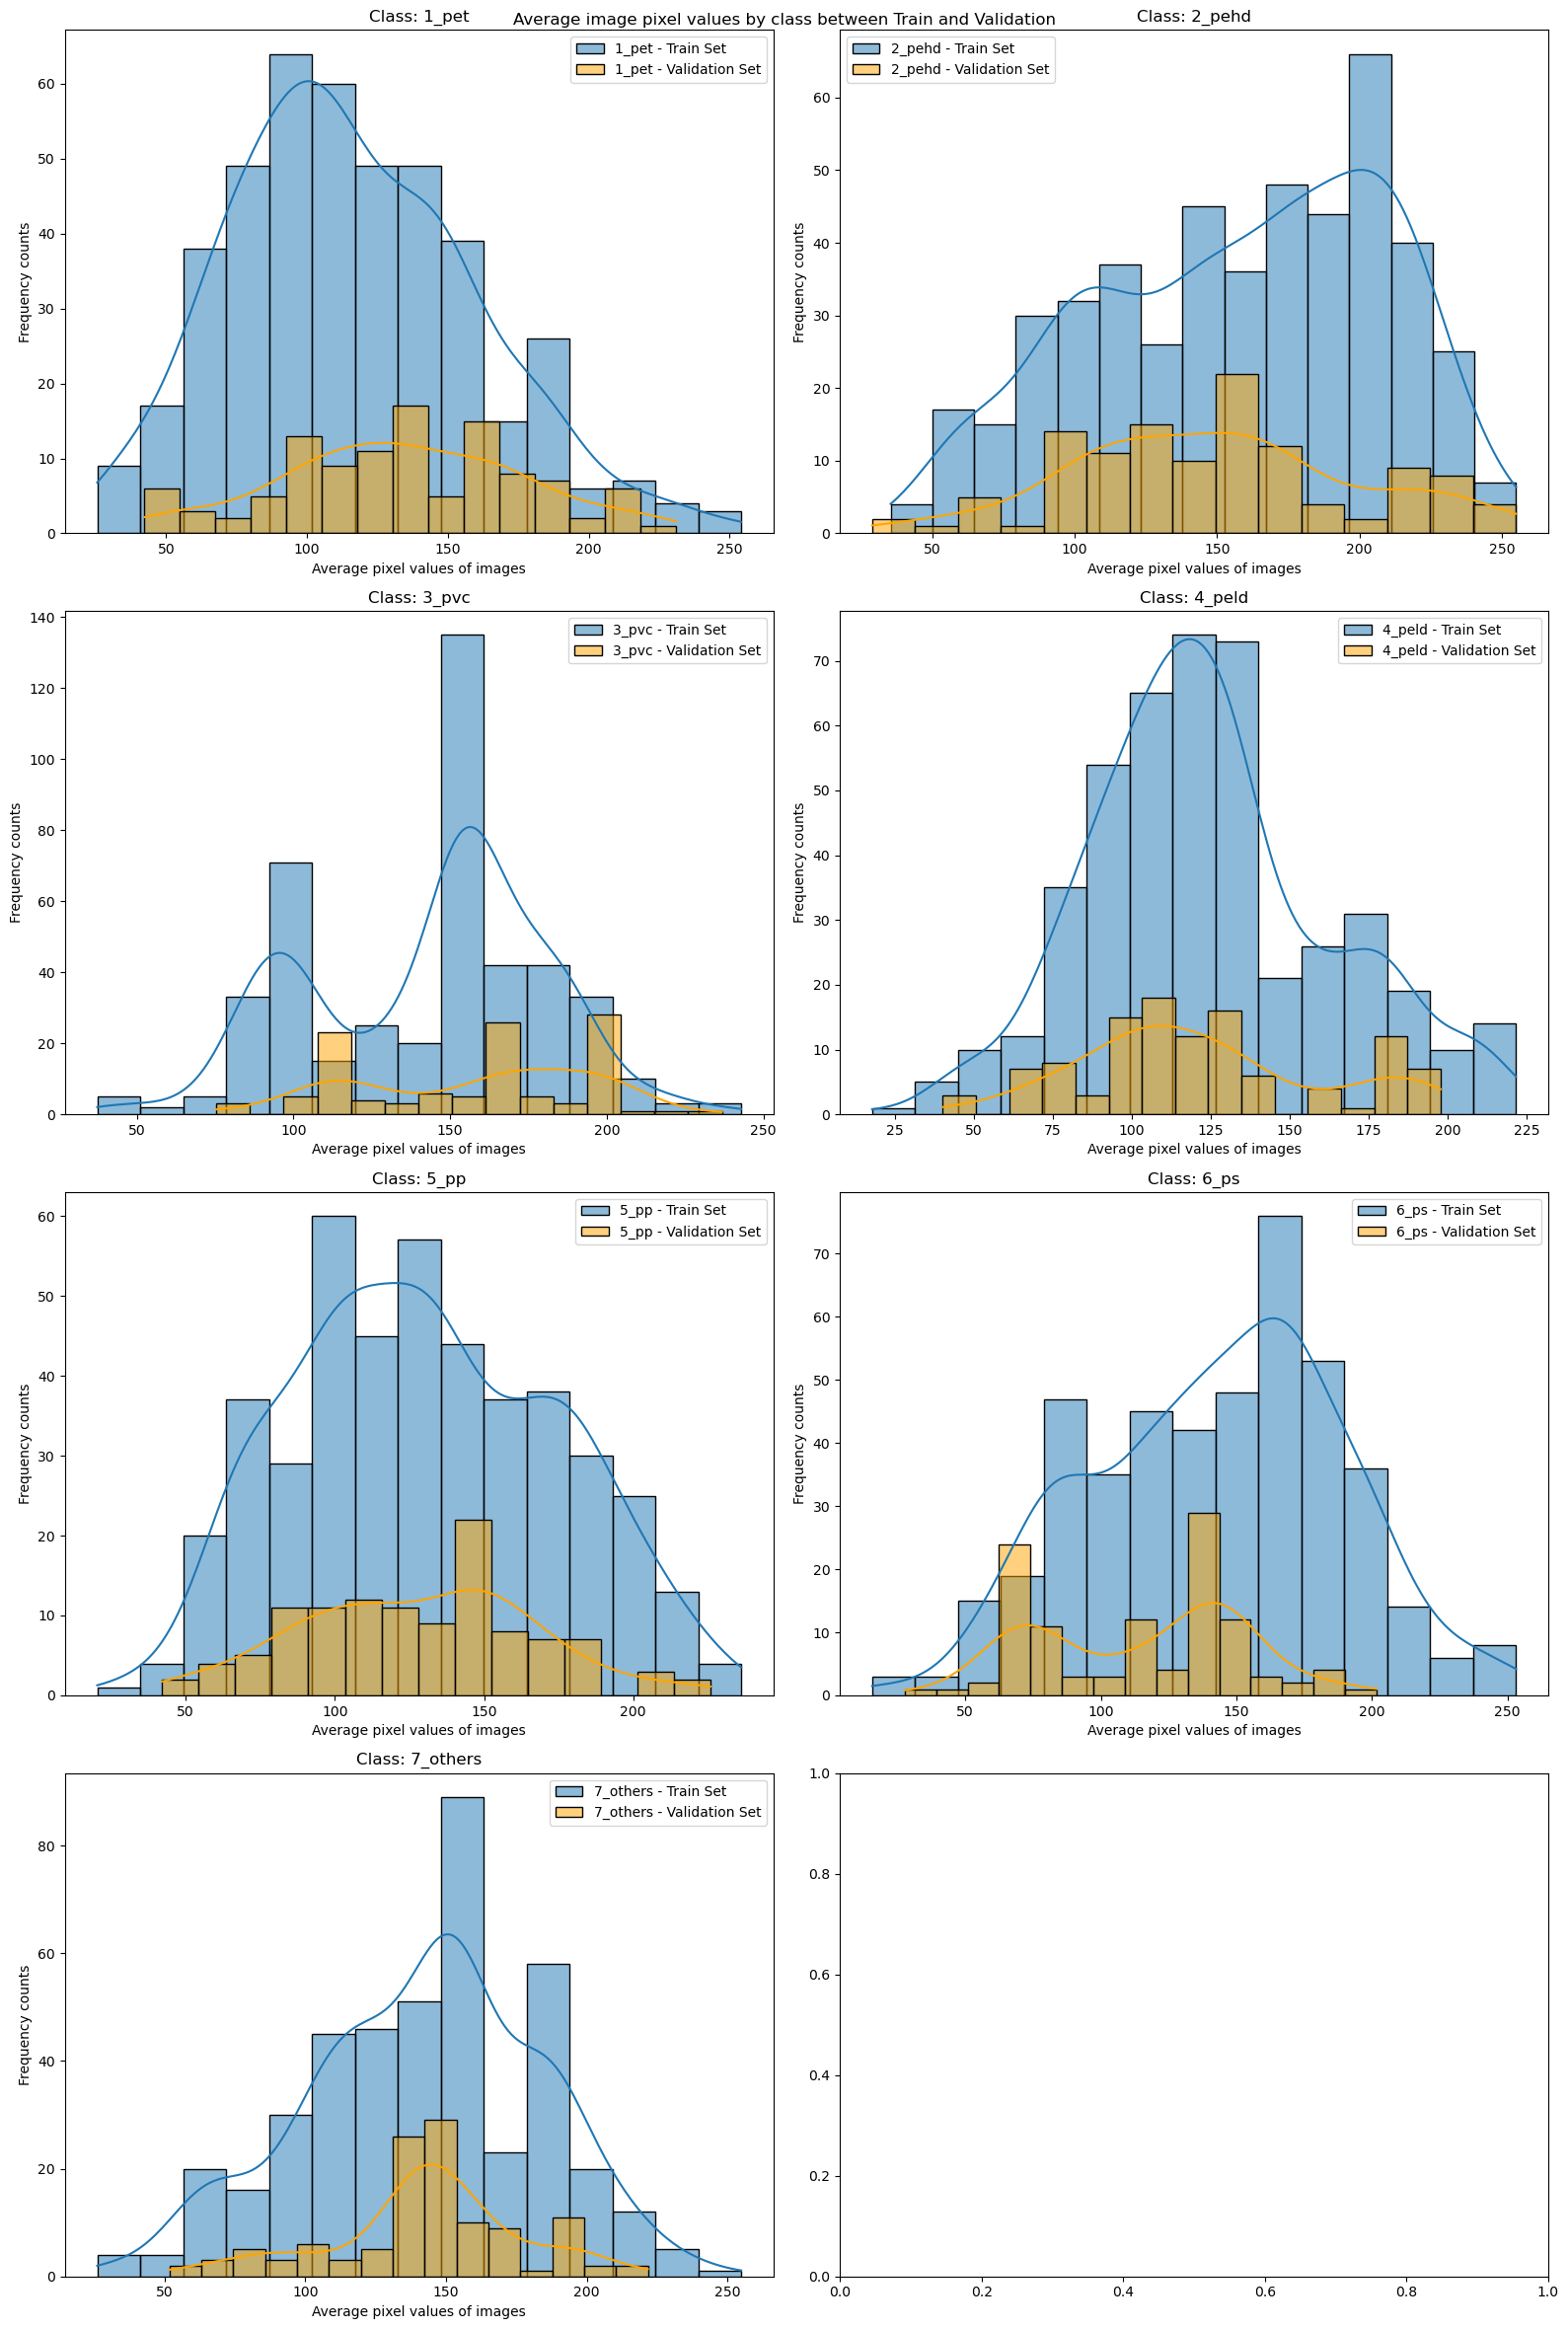

In [74]:
#Check average pixel distribution
train_class_averages = avg_pixel_counter(train_folder)
val_class_averages = avg_pixel_counter(val_folder)

# Create a figure and axis
fig, axs = plt.subplots(4, 2, figsize=(16, 24))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Average image pixel values by class between Train and Validation')

# Iterate through the keys and plot histograms from both dictionaries with different colors
colors = ['blue', 'orange']
for i, key in enumerate(train_class_averages.keys()):
    row, col = i // 2, i % 2
    train_averages = train_class_averages[key]
    test_averages = val_class_averages[key]
    
    sns.histplot(data= train_averages, bins= 15, label= f'{key} - Train Set', color='tab:blue', kde=True, ax= axs[row, col], )
    sns.histplot(data= test_averages, bins= 15, label=f'{key} - Validation Set', color='orange', kde=True, ax= axs[row, col], )

    axs[row, col].set_title(f'Class: {key}')
    axs[row, col].set_xlabel('Average pixel values of images')
    axs[row, col].set_ylabel('Frequency counts')
    axs[row, col].legend()

# adjust layout
plt.tight_layout()
# Show the plot
plt.show()


> While it seems that augmentation has helped to fill in some gaps, as expected there are still significant differences in the average pixel values amongst the train and val dataset on a class basis. This would make for an interesting next step if proceed in the direction the exploration of multiclass classification.

## Final form - binary dataset

In [75]:
# Load the Train and Validation data
train_bin_folder = 'data/train_binary/'
val_bin_folder = 'data/val_binary/'
train_bin_data = ImageDataGenerator(rescale=1./255).flow_from_directory(train_bin_folder, 
                                                                     class_mode= 'sparse',
                                                                     shuffle=False
                                                                    )

val_bin_data = ImageDataGenerator(rescale=1./255).flow_from_directory(val_bin_folder, 
                                                                   class_mode='sparse',
                                                                   seed = 42,
                                                                   shuffle=False
                                                                  )

Found 3119 images belonging to 2 classes.
Found 799 images belonging to 2 classes.


In [76]:
# Check the classes that ImageDataGenerator was able to find using .class_indices
binary_mappings = train_bin_data.class_indices # save output mappings dictionary to 'class_mappings' variable to use later for predictions
print(binary_mappings) # shows us that each class, N, has been-> assigned to class N-1

{'0_non': 0, '1_recyclable': 1}


### Recheck distribution

#### Pictures no. distribution

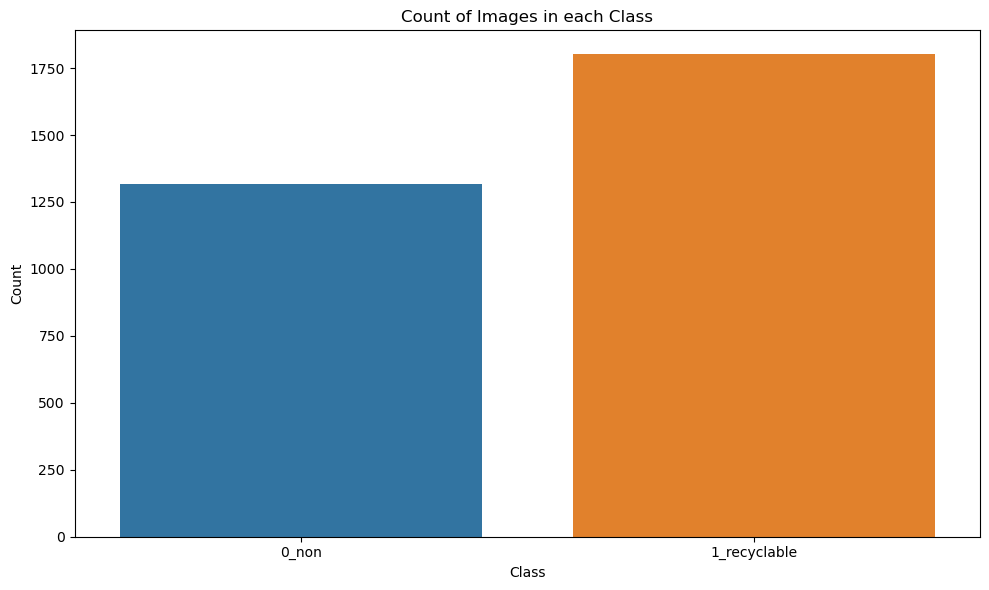

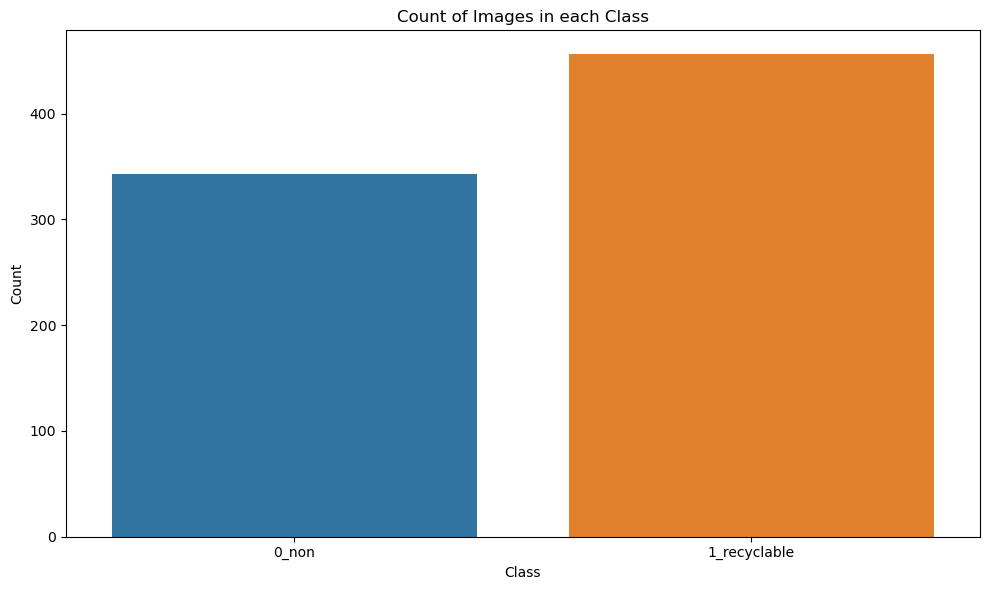

In [77]:
class_distribution(train_bin_folder)
class_distribution(val_bin_folder)

> After data augmentation both train and test have similar image counts in each class but there is a slight imbalance in the classes indicating that any modelling done may have to consider regularization or the likes to address likely overfitting issues.

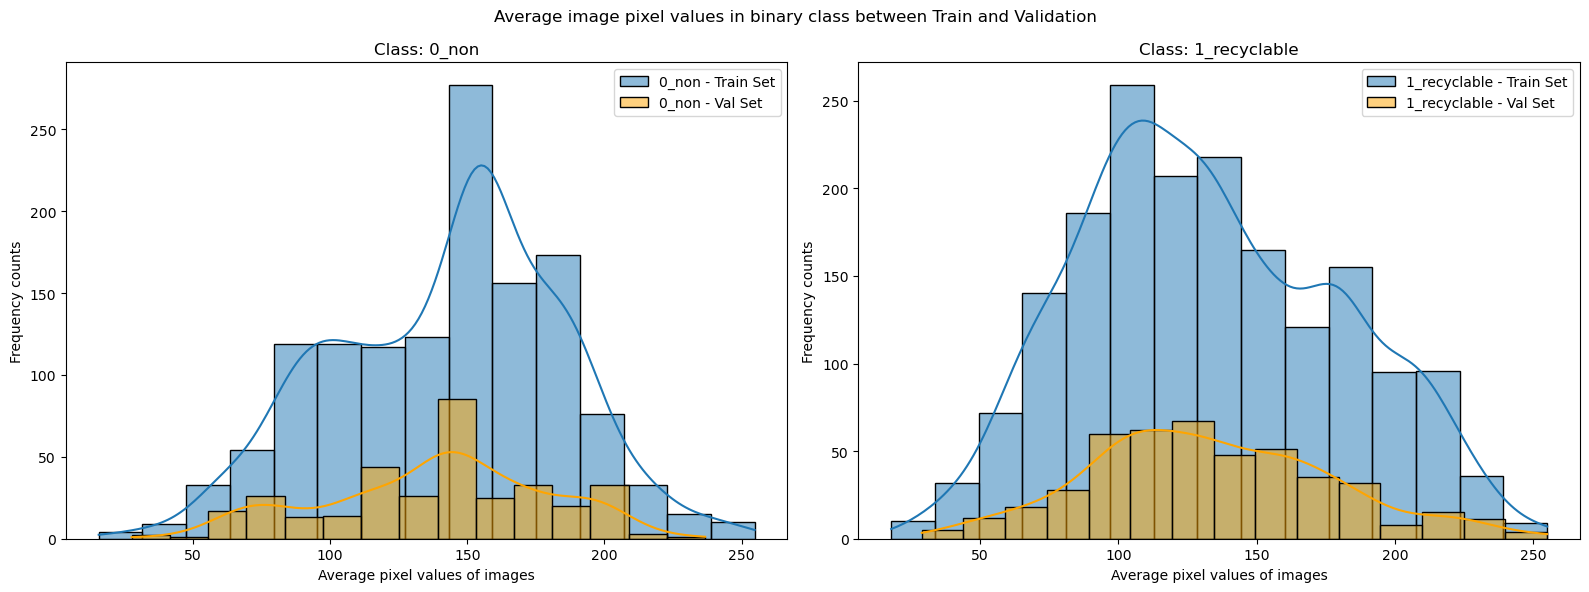

In [78]:
#Check average pixel distribution
train_bin_averages = avg_pixel_counter(train_bin_folder)
val_bin_averages = avg_pixel_counter(val_bin_folder)

# Create a figure and axis
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Average image pixel values in binary class between Train and Validation')

# Iterate through the keys and plot histograms from both dictionaries with different colors
colors = ['blue', 'orange']
for i, key in enumerate(train_bin_averages.keys()):
    train_averages = train_bin_averages[key]
    test_averages = val_bin_averages[key]
    
    sns.histplot(data= train_averages, bins= 15, label= f'{key} - Train Set', color='tab:blue', kde=True, ax= axs[i] )
    sns.histplot(data= test_averages, bins= 15, label=f'{key} - Val Set', color='orange', kde=True, ax= axs[i] )

    axs[i].set_title(f'Class: {key}')
    axs[i].set_xlabel('Average pixel values of images')
    axs[i].set_ylabel('Frequency counts')
    axs[i].legend()

# adjust layout
plt.tight_layout()
# Show the plot
plt.show()


> Taking a closer look into the pixel distribution, it seems that augmentation has really helped to fill in the gaps for the positive class "1_recyclable" but there are still some differences in the average pixel values in the dataset of the negative class "0_non" (non-recyclable). This is likely due to "0_non" only combining 3 classes of which all 3 has the issue of scarce data. This may cause some issue with validating the model later, but it can only be determined after setting it up.

# Summary

Overall, the data sourced while initially promising seems to be lacking in terms of quantity but data augmentation has been done to increase its quantity although the distribution of the images are still not ideal. Nevertheless, the data should still be sufficient for a training a binary classification model.